<a href="https://colab.research.google.com/github/Joagai23/SistemasInteligentesPokerBot/blob/master/Poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [363]:
!pip install PyPokerEngine

In [364]:
!pip install scikit-fuzzy

Se calcula la probabilidad

In [0]:
#probabilidad de victoria
#ver como funciona
def estimate_hand_strength(nb_simulation, nb_player, hole_card, community_card):
    simulation_results = []
    for i in range(nb_simulation):
        opponents_cards = []
        for j in range(nb_player-1):  # nb_opponents = nb_player - 1
            opponents_cards.append(draw_cards_from_deck(num=2))
        nb_need_community = 5 - len(community_card)
        community_card.append(draw_cards_from_deck(num=nb_need_community))
        result = observe_game_result(hole_card, community_card, opponents_cards)  # return 1 if win else 0
        simulation_results.append(result)
    average_win_rate = 1.0 * sum(simulation_results) / len(simulation_results)
    return average_win_rate

In [0]:
nb_players=3
nb_simulation=10000

In [0]:
#S=spares, D=Diamonds, C=Treboles, H=hearts
#EN LA PRIMERA SI HAY MAS DEL 0.4 VALE LA PENA SEGUIR
#SI BAJA FUERA, SI SUBE SE SIGUE (MAS DE 0.7)
#EN LA 3 SI HAY MAS DEL 0.9 SUBE
#USAR SOLO CON EL BOT
def winPercentage (hole_card, community_card, nb_players, nb_simulation):
    from pypokerengine.utils.card_utils import gen_cards, estimate_hole_card_win_rate
    if community_card==[]:
      roundNumber=0
    #yourCard1= 'HJ'
    #yourCard2= 'HA'
    #hole_card = gen_cards([yourCard1, yourCard2])
    #community_card = gen_cards([])
    winRate = estimate_hole_card_win_rate(nb_simulation=nb_simulation, nb_player=nb_players, hole_card=hole_card, community_card=community_card)
    winRate
    return winRate

In [448]:
from pypokerengine.utils.card_utils import gen_cards, estimate_hole_card_win_rate
roundNumber=0
yourCard1= 'HJ'
yourCard2= 'CA'
hole_card = gen_cards([yourCard1, yourCard2])
community_card = gen_cards([])
winRate = estimate_hole_card_win_rate(nb_simulation=nb_simulation, nb_player=nb_players, hole_card=hole_card, community_card=community_card)
winRate

0.4681

In [400]:
from pypokerengine.utils.card_utils import gen_cards, estimate_hole_card_win_rate
roundNumber=1
hole_card = gen_cards([yourCard1, yourCard2])
card1= 'HQ'
card2= 'H2'
card3= 'D3'
community_card = gen_cards([card1, card2, card3])
winRate = estimate_hole_card_win_rate(nb_simulation=nb_simulation, nb_player=nb_players, hole_card=hole_card, community_card=community_card)
winRate

0.3462

In [401]:
from pypokerengine.utils.card_utils import gen_cards, estimate_hole_card_win_rate
roundNumber=2
hole_card = gen_cards([yourCard1, yourCard2])
card4= 'DK'
community_card = gen_cards([card1, card2, card3, card4])
winRate = estimate_hole_card_win_rate(nb_simulation=nb_simulation, nb_player=nb_players, hole_card=hole_card, community_card=community_card)
winRate

0.2919

In [402]:
from pypokerengine.utils.card_utils import gen_cards, estimate_hole_card_win_rate
roundNumber=3
hole_card = gen_cards([yourCard1, yourCard2])
card5= 'C8'
community_card = gen_cards([card1, card2, card3, card4, card5])
winRate = estimate_hole_card_win_rate(nb_simulation=nb_simulation, nb_player=nb_players, hole_card=hole_card, community_card=community_card)
winRate

0.1481

# Fuzzy Logic

In [0]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [0]:
#Fuzzy1
#Antecedentes: ronda, porcentage, dinero
#Consecuencia:accion
#acciones->abandonar, seguir, apostar
rounds = ctrl.Antecedent(np.arange(0, 4, 1), 'Round')
percentage = ctrl.Antecedent(np.arange(0, 1.01, 0.1), 'Percentage') 
money = ctrl.Antecedent(np.arange(0, 101, 1), 'Money')

act = ctrl.Consequent(np.arange(0, 1.01, 0.1), 'Action')

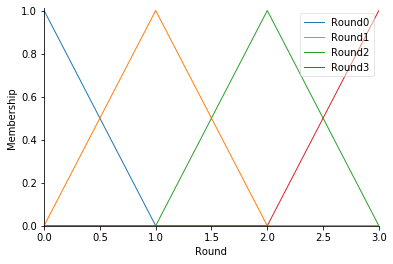

In [405]:
rounds['Round0'] = fuzz.trimf(rounds.universe, [0, 0, 1])
rounds['Round1'] = fuzz.trimf(rounds.universe, [1, 1, 2])
rounds['Round2'] = fuzz.trimf(rounds.universe, [2, 2, 3])
rounds['Round3'] = fuzz.trimf(rounds.universe, [3, 3, 4])
rounds.view()

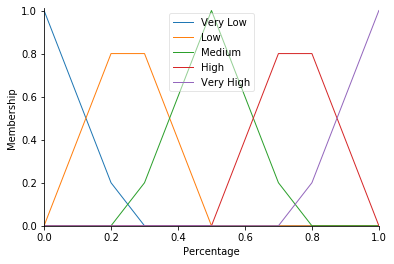

In [406]:
percentage['Very Low'] = fuzz.trimf(percentage.universe, [0, 0, 0.25])
percentage['Low'] = fuzz.trimf(percentage.universe, [0, 0.25, 0.5])
percentage['Medium'] = fuzz.trimf(percentage.universe, [0.25, 0.5, 0.75])
percentage['High'] = fuzz.trimf(percentage.universe, [0.5, 0.75, 1])
percentage['Very High'] = fuzz.trimf(percentage.universe, [0.75, 1, 1])
percentage.view()

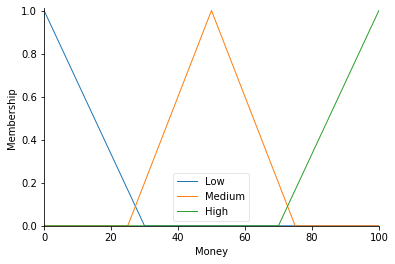

In [407]:
money['Low'] = fuzz.trimf(money.universe, [0, 0, 30])
money['Medium'] = fuzz.trimf(money.universe, [25, 50, 75])
money['High'] = fuzz.trimf(money.universe, [70, 100, 100])
money.view()

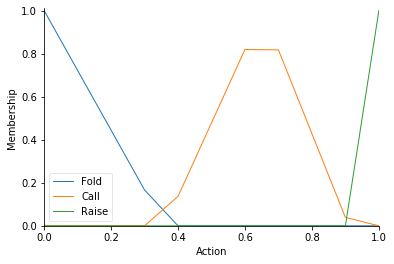

In [408]:
act['Fold'] = fuzz.trimf(act.universe, [0, 0, 0.36])
act['Call'] = fuzz.trimf(act.universe, [0.36, 0.653, 0.91])
act['Raise'] = fuzz.trimf(act.universe, [0.91, 1, 1])
act.view()

In [0]:
#RULES para ver si abandonar, seguir o apostar
rule1  = ctrl.Rule(percentage['Very Low'],                                                                                                         act['Fold'])
rule2  = ctrl.Rule(percentage['Very High'],                                                                                                        act['Raise'])
rule3  = ctrl.Rule(rounds['Round0']    &   (percentage['High']   | percentage['Medium'] | percentage['Low']),                                      act['Call'])
rule4  = ctrl.Rule(rounds['Round1']    &    percentage['Low']                                                  &  money['Low'],                    act['Fold'])
rule5  = ctrl.Rule(rounds['Round1']    &    percentage['Low']                                                  & (money['Medium'] | money['Low']), act['Call'])
rule6  = ctrl.Rule(rounds['Round1']    &   (percentage['Medium'] | percentage['High']),                                                            act['Call'])
rule7  = ctrl.Rule(rounds['Round2']    &   (percentage['Low']    | percentage['Medium'])                       & (money['Medium'] | money['Low']), act['Fold'])
rule8  = ctrl.Rule(rounds['Round2']    &   (percentage['Low']    | percentage['Medium'])                       &  money['High'],                   act['Call'])
rule9  = ctrl.Rule(rounds['Round2']    &    percentage['High'],                                                                                    act['Call'])
rule10 = ctrl.Rule(rounds['Round3']    &   (percentage['Low']    | percentage['Medium']),                                                          act['Fold'])
rule11 = ctrl.Rule(rounds['Round3']    &   percentage['High'],                                                                                     act['Call'])

In [0]:
action_ctrl = ctrl.ControlSystem([rule1,  rule2,  rule3,  rule4,  rule5,  rule6,  rule7,  rule8,  rule9, rule10, rule11])

In [0]:
action = ctrl.ControlSystemSimulation(action_ctrl)

In [0]:
def getAction(roundNum, percentageVal, moneyVal):
    
    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    action.input['Round'] = roundNum
    action.input['Percentage'] = percentageVal
    action.input['Money'] = moneyVal


    # Crunch the numbers
    action.compute()

    string = ""

    #if action.output['Action'] < 0.36:
    if percentageVal < 0.36:
      string = "Fold"
    #elif action.output['Action'] >= 0.36 and action.output['Action'] < 0.91:
    elif percentageVal >= 0.36 and percentageVal < 0.91:
      string = "Call"
    #elif action.output['Action'] >= 0.91 and action.output['Action'] <= 1:
    elif percentageVal >= 0.91 and percentageVal <= 1:
      string = "Raise"
    
    act.view(sim=action)
    print("Action:", string)
    
    rounds.view(sim=action)
    percentage.view(sim=action)
    money.view(sim=action)
    #return string

Action: Fold


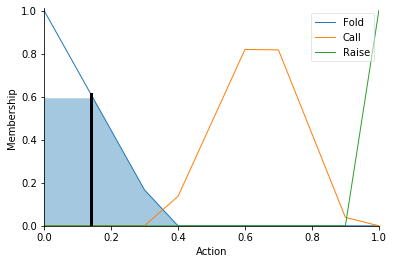

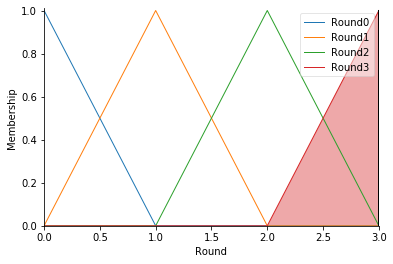

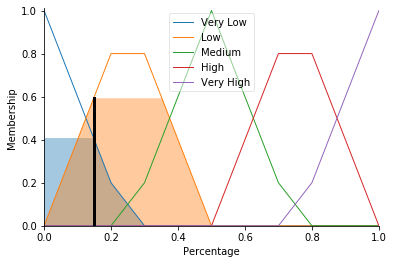

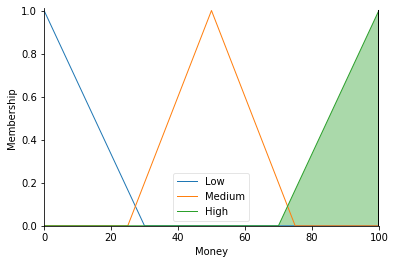

In [415]:
getAction(roundNumber, winRate, 100)

In [0]:
#Fuzzy2
#Antecedentes: ronda, porcentage, dinero
#Consecuencia:cantidad de tu dinero que debes apostar
#correlacion con la anterior, se ejecuta siempre
rounds2 = ctrl.Antecedent(np.arange(0, 4, 1), 'Round')
percentage2 = ctrl.Antecedent(np.arange(0, 1.01, 0.1), 'Percentage') 
money2 = ctrl.Antecedent(np.arange(0, 101, 1), 'Money')

moneyPerc = ctrl.Consequent(np.arange(0, 1.01, 0.1), 'Percentageofyourmoney')

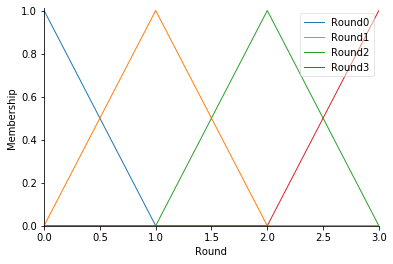

In [417]:
rounds2['Round0'] = fuzz.trimf(rounds2.universe, [0, 0, 1])
rounds2['Round1'] = fuzz.trimf(rounds2.universe, [1, 1, 2])
rounds2['Round2'] = fuzz.trimf(rounds2.universe, [2, 2, 3])
rounds2['Round3'] = fuzz.trimf(rounds2.universe, [3, 3, 4])
rounds2.view()

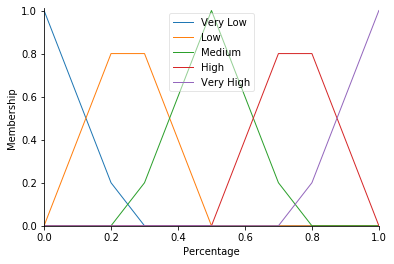

In [418]:
percentage2['Very Low'] = fuzz.trimf(percentage2.universe, [0, 0, 0.25])
percentage2['Low'] = fuzz.trimf(percentage2.universe, [0, 0.25, 0.5])
percentage2['Medium'] = fuzz.trimf(percentage2.universe, [0.25, 0.5, 0.75])
percentage2['High'] = fuzz.trimf(percentage2.universe, [0.5, 0.75, 1])
percentage2['Very High'] = fuzz.trimf(percentage2.universe, [0.75, 1, 1])
percentage2.view()

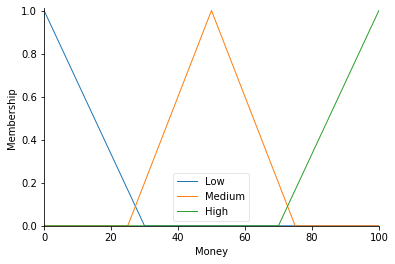

In [419]:
money2['Low'] = fuzz.trimf(money2.universe, [0, 0, 30])
money2['Medium'] = fuzz.trimf(money2.universe, [25, 50, 75])
money2['High'] = fuzz.trimf(money2.universe, [70, 100, 100])
money2.view()

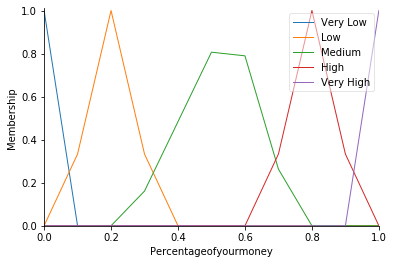

In [420]:
#porcentage de tu dinero que vas a apostar
moneyPerc['Very Low'] = fuzz.trimf(moneyPerc.universe, [0, 0, 0.1])
moneyPerc['Low'] = fuzz.trimf(moneyPerc.universe, [0.05, 0.2, 0.35])
moneyPerc['Medium'] = fuzz.trimf(moneyPerc.universe, [0.25, 0.56, 0.75])
moneyPerc['High'] = fuzz.trimf(moneyPerc.universe, [0.65, 0.8, 0.95])
moneyPerc['Very High'] = fuzz.trimf(moneyPerc.universe, [0.9, 1, 1])
moneyPerc.view()

In [0]:
rule21  = ctrl.Rule(percentage2['Very Low'],                                                                                                         moneyPerc['Very Low']) #FOLD
rule22  = ctrl.Rule(percentage2['Very High'],                                                                                                        moneyPerc['Very High']) #RAISE
rule23  = ctrl.Rule(rounds2['Round0']    &   (percentage2['Medium'] | percentage2['Low']),                                                              moneyPerc['Very Low']) #CALL
rule24  = ctrl.Rule(rounds2['Round0']    &   percentage2['High'],                                                                                        moneyPerc['Low']) #CALL
rule25  = ctrl.Rule(rounds2['Round1']    &    percentage2['Low']                                                  &  money2['Low'],                    moneyPerc['Very Low']) #FOLD
rule26  = ctrl.Rule(rounds2['Round1']    &    percentage2['Low']                                                  & (money2['Medium'] | money2['Low']), moneyPerc['Low']) #CALL
rule27  = ctrl.Rule(rounds2['Round1']    &   (percentage2['Medium'] | percentage2['High']),                                                            moneyPerc['Medium']) #CALL
rule28  = ctrl.Rule(rounds2['Round2']    &   (percentage2['Low']    | percentage2['Medium'])                       & (money2['Medium'] | money2['Low']), moneyPerc['Very Low']) #FOLD
rule29  = ctrl.Rule(rounds2['Round2']    &   (percentage2['Low']    | percentage2['Medium'])                       &  money2['High'],                   moneyPerc['Medium']) #CALL
rule30  = ctrl.Rule(rounds2['Round2']    &    percentage2['High'],                                                                                    moneyPerc['High']) #CALL OR RAISE
rule31 = ctrl.Rule(rounds2['Round3']    &   (percentage2['Low']    | percentage2['Medium']),                                                          moneyPerc['Very Low']) #FOLD
rule32 = ctrl.Rule(rounds2['Round3']    &   percentage2['High'],                                                                                     moneyPerc['High']) #CALL OR RAISE

In [0]:
action_ctrl = ctrl.ControlSystem([rule21,  rule22,  rule23,  rule24,  rule25,  rule26,  rule27,  rule28,  rule29, rule30, rule31, rule32])

In [0]:
action = ctrl.ControlSystemSimulation(action_ctrl)

In [0]:
def getMoneyPercentage(roundNum, percentageVal, moneyVal): #, small_blind):
    
    import math
    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    action.input['Round'] = roundNum
    action.input['Percentage'] = percentageVal
    action.input['Money'] = moneyVal


    # Crunch the numbers
    action.compute()
    dollars=math.floor(action.output['Percentageofyourmoney']*moneyVal)
    if dollars<5 and roundNum==0:
      dollars=5 #puja minima
    print("Max Beat:", dollars)
    
    moneyPerc.view(sim=action)
    
    rounds2.view(sim=action)
    percentage2.view(sim=action)
    money2.view(sim=action)
    #return dollars

Max Beat: 3


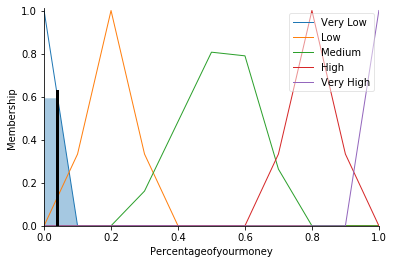

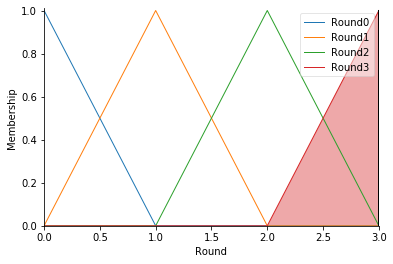

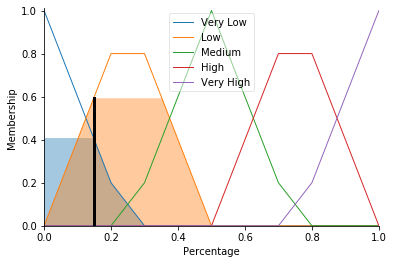

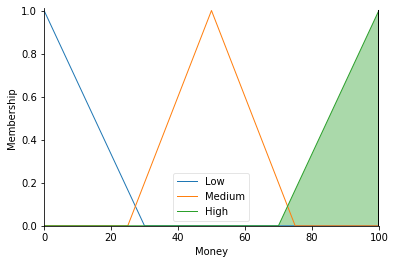

In [432]:
getMoneyPercentage(roundNumber, winRate, 100) #, 5)

# Poker Bot

In [0]:
import pypokerengine
from pypokerengine.api.game import setup_config, start_poker
import random
from pypokerengine.players import BasePokerPlayer


class FishPlayer(BasePokerPlayer):  # Do not forget to make parent class as "BasePokerPlayer"

    #  we define the logic to make an action through this method. (so this method would be the core of your AI)
    def declare_action(self, valid_actions, hole_card, round_state):
        # valid_actions format => [raise_action_info, call_action_info, fold_action_info]
        call_action_info = valid_actions[1]
        action, amount = call_action_info["action"], call_action_info["amount"]
        return action, amount   # action returned here is sent to the poker engine

    def receive_game_start_message(self, game_info):
        pass

    def receive_round_start_message(self, round_count, hole_card, seats):
        pass

    def receive_street_start_message(self, street, round_state):
        pass

    def receive_game_update_message(self, action, round_state):
        pass

    def receive_round_result_message(self, winners, hand_info, round_state):
        pass

# Player

In [0]:
#Jugador Consola

import pypokerengine.utils.visualize_utils as U

class ConsolePlayer(BasePokerPlayer):

    def declare_action(self, valid_actions, hole_card, round_state):
        print(U.visualize_declare_action(valid_actions, hole_card, round_state, self.uuid))
        action, amount = self._receive_action_from_console(valid_actions)
        return action, amount

    def receive_game_start_message(self, game_info):
        print(U.visualize_game_start(game_info, self.uuid))
        self._wait_until_input()

    def receive_round_start_message(self, round_count, hole_card, seats):
        print(U.visualize_round_start(round_count, hole_card, seats, self.uuid))
        self._wait_until_input()

    def receive_street_start_message(self, street, round_state):
        print(U.visualize_street_start(street, round_state, self.uuid))
        self._wait_until_input()

    def receive_game_update_message(self, new_action, round_state):
        print(U.visualize_game_update(new_action, round_state, self.uuid))
        self._wait_until_input()

    def receive_round_result_message(self, winners, hand_info, round_state):
        print(U.visualize_round_result(winners, hand_info, round_state, self.uuid))
        self._wait_until_input()

    def _wait_until_input(self):
        input("Enter some key to continue ...")

    # FIXME: This code would be crash if receives invalid input.
    #        So you should add error handling properly.
    def _receive_action_from_console(self, valid_actions):
        action = input("Enter action to declare >> ")
        #winPercentage(hole_card, community_card, 2, 2000)
        #print (winRate)
        #getAction(roundNumber, winRate, 100)
        if action == 'fold': amount = 0
        if action == 'call':  
          #getMoneyPercentage (roundNumber, winRate, initial_stack, small_blind_amount)
          amount = valid_actions[1]['action']
        if action == 'raise':  
          #getMoneyPercentage (roundNumber, winRate, 100)
          amount = int(input("Enter raise amount >> "))
        return action, amount

# Play against the bot

In [445]:
#Juega una partida
from pypokerengine.api.game import setup_config, start_poker

config = setup_config(max_round=4, initial_stack=100, small_blind_amount=5)
config.register_player(name="fish_player", algorithm=FishPlayer())
config.register_player(name="human_player", algorithm=ConsolePlayer())
game_result = start_poker(config, verbose=0)  # verbose=0 because game progress is visualized by ConsolePlayer

-- Game start (UUID = nhxcmywuaqbaxbtwfykluv) --
-- rule --
  - 2 players game
  - 4 round
  - start stack = 100
  -        ante = 0
  - small blind = 5
Enter some key to continue ...
-- Round 1 start (UUID = nhxcmywuaqbaxbtwfykluv) --
-- hole card --
  - ['D2', 'DK']
-- players information --
  - 0 : fish_player (ijpmxvfpgueymujwbkpfgs) => state : participating, stack : 90
  - 1 : human_player (nhxcmywuaqbaxbtwfykluv) => state : participating, stack : 95
Enter some key to continue ...
-- New street start (UUID = nhxcmywuaqbaxbtwfykluv) --
-- street --
  - preflop
Enter some key to continue ...
-- Declare your action (UUID = nhxcmywuaqbaxbtwfykluv) --
-- valid actions --
  - fold
  - call: 10
  - raise: [15, 100]
-- hole card --
  - ['D2', 'DK']
-- round state --
  - dealer btn : fish_player
  - street : preflop
  - community card : []
  - pot : main = 15, side = []
  - players information
    - 0 : fish_player (ijpmxvfpgueymujwbkpfgs) => state : participating, stack : 90 <= BB
    - 1